# The Economic Cost of Happiness: Analyzing Inflation and World Happiness Index

This notebook analyzes the relationship between economic inflation and national happiness levels.

## Library Imports

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Data Loading and Inspection

In [2]:
# Load the dataset
df = pd.read_csv('WHI_Inflation.csv')

# Display basic information
print("Dataset Preview:")
df.head()

Dataset Preview:


,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

In [4]:
# Descriptive statistics
df.describe()

,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1232.000000,1200.000000,1090.000000,1130.000000,734.000000,769.000000,1211.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1231.000000
mean,2018.895292,7.395445,6.424233,8.030094,3.512612,5.841887,7.070015,5.499001,1.030767,1.056623,0.588755,0.459393,0.196145,0.133454
std,2.554602,25.165914,16.591503,26.170251,5.513661,13.679284,31.623180,1.135263,0.452230,0.332605,0.244042,0.155579,0.112531,0.115169
min,2015.000000,-3.752996,-23.879999,-22.030001,-28.619415,-83.339781,-26.100000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.402264,0.607611,1.264364,1.041840,-0.283404,1.352541,4.624650,0.736952,0.859935,0.407759,0.370090,0.117000,0.055902
50%,2019.000000,3.476146,2.769178,3.728997,2.245673,2.729256,3.244246,5.538950,1.051500,1.093500,0.617830,0.481000,0.183000,0.098000
75%,2021.000000,6.875713,7.101345,9.293584,4.626995,8.433447,7.079739,6.335750,1.343000,1.313843,0.781501,0.575416,0.252000,0.171000
max,2023.000000,557.210000,306.431673,601.020236,58.851863,128.476638,812.247463,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


In [5]:
# Check missing values
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation          32
Energy Consumer Price Inflation           142
Food Consumer Price Inflation             102
Official Core Consumer Price Inflation    498
Producer Price Inflation                  463
GDP deflator Index growth rate             21
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

## Data Cleaning and Preprocessing

In [6]:
# Handle missing values - drop rows with missing values in key columns
df_cleaned = df.dropna(subset=['Headline Consumer Price Inflation', 'Score'])

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (1232, 16)
Cleaned dataset shape: (1200, 16)


In [7]:
# Aggregate data by country
df_by_country = df_cleaned.groupby('Country').mean().reset_index()
print(f"Aggregated dataset shape: {df_by_country.shape}")
df_by_country.head()

Aggregated dataset shape: (144, 15)


,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2018.5,4.091625,0.247965,3.391304,2.677489,NaN,2.819803,3.132237,0.401784,0.300650,0.244324,0.073702,0.210611,0.038337
1,Albania,2019.0,2.731355,1.919616,4.471056,1.921355,3.034093,2.810348,4.893189,1.055091,0.747904,0.736645,0.430271,0.161051,0.036707
2,Algeria,2019.0,5.497095,2.216326,5.613370,NaN,3.733151,3.758533,5.409011,1.074519,1.060781,0.630523,0.165903,0.087557,0.142410
3,Angola,2016.5,22.752683,NaN,23.467114,NaN,17.169425,18.658937,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570
4,Argentina,2019.0,52.301261,51.749976,59.595292,NaN,59.590534,47.962802,6.243522,1.214182,1.277483,0.709917,0.512771,0.085551,0.068439


## Exploratory Data Analysis (EDA)

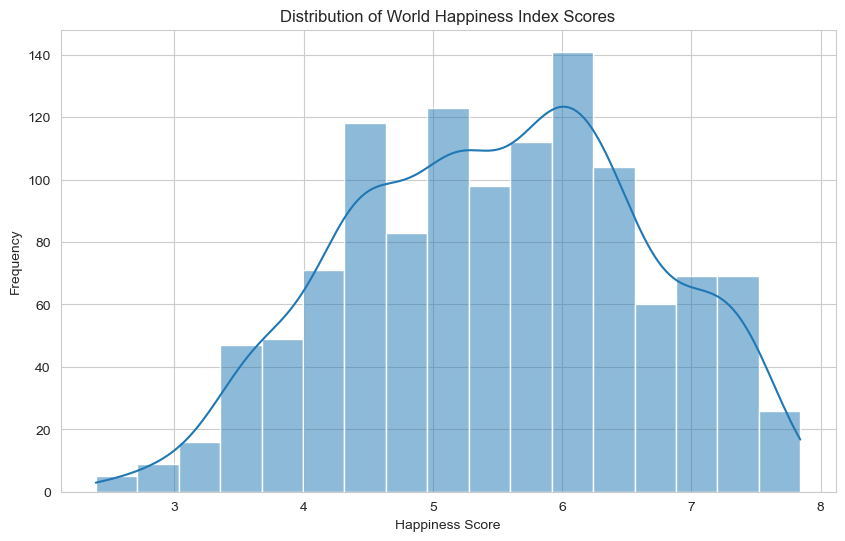

In [8]:
# Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Score'], kde=True)
plt.title('Distribution of World Happiness Index Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

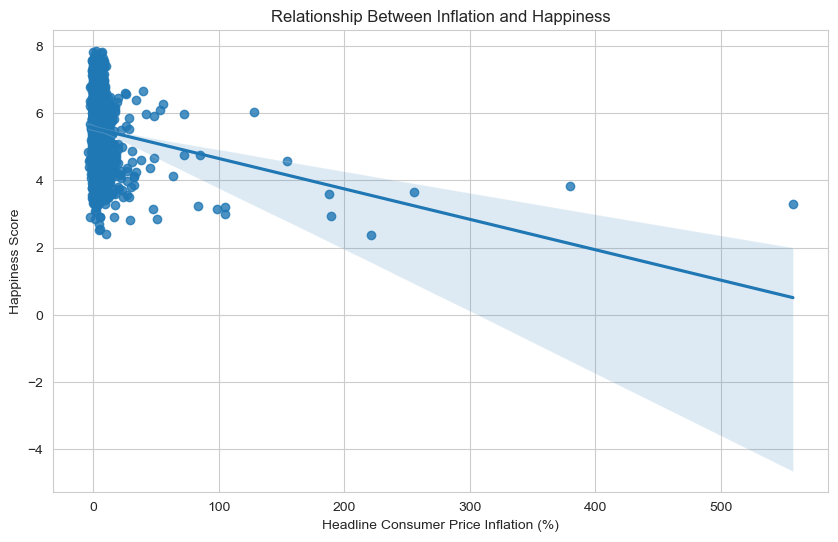

In [9]:
# Scatter plot: Inflation vs. Happiness
plt.figure(figsize=(10, 6))
sns.regplot(x='Headline Consumer Price Inflation', y='Score', data=df_cleaned)
plt.title('Relationship Between Inflation and Happiness')
plt.xlabel('Headline Consumer Price Inflation (%)')
plt.ylabel('Happiness Score')
plt.show()

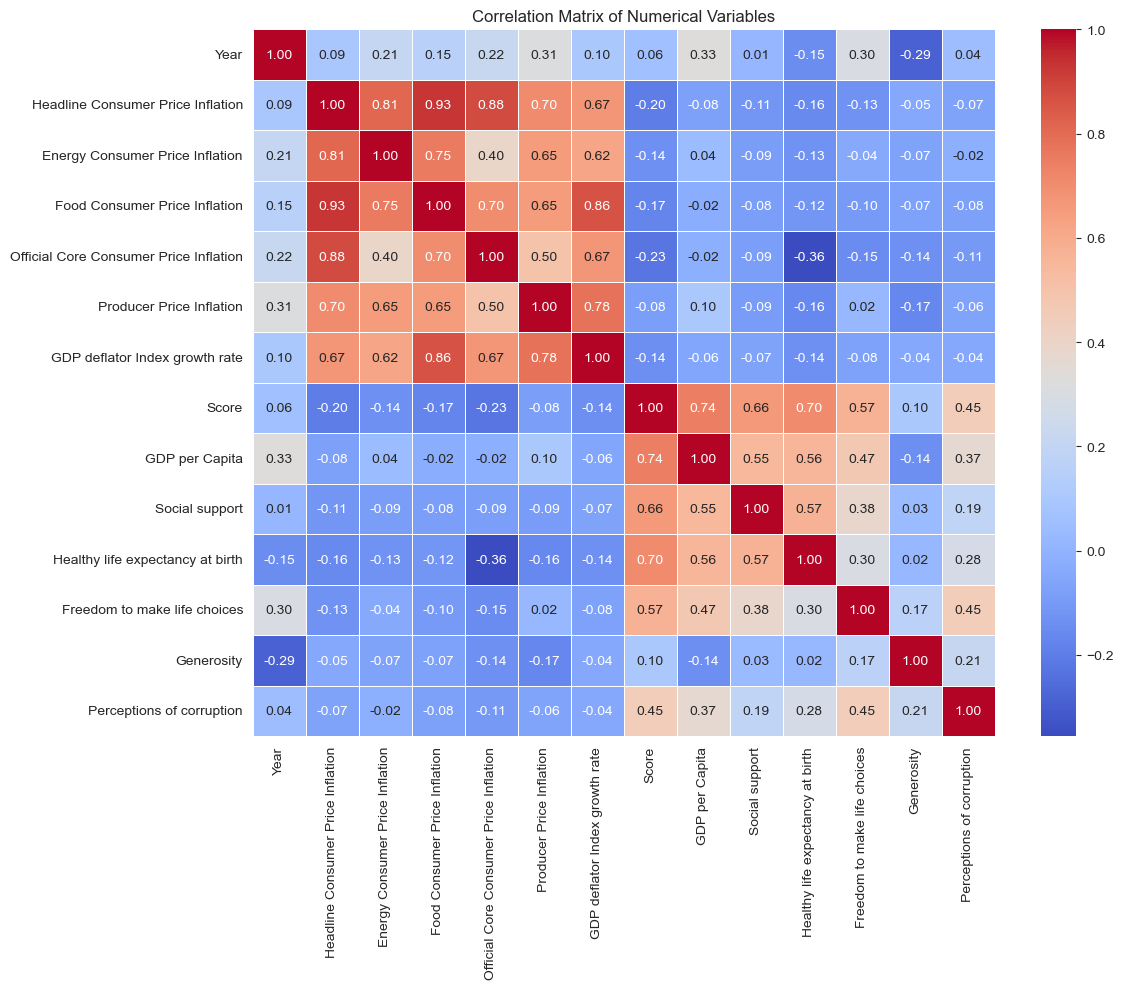

In [10]:
# Correlation Heatmap
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

## Model Building - Simple Linear Regression

In [11]:
# Prepare data for modeling
X_simple = df_cleaned[['Headline Consumer Price Inflation']].values
y = df_cleaned['Score'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 960
Testing set size: 240


In [12]:
# Train simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Make predictions
y_pred_simple = simple_model.predict(X_test)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression Results:")
print(f"Coefficient (Slope): {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Mean Squared Error: {mse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")

Simple Linear Regression Results:
Coefficient (Slope): -0.0084
Intercept: 5.5456
Mean Squared Error: 1.1643
R² Score: 0.0344


## Model Building - Multiple Linear Regression

In [13]:
# Select features for multiple regression
features = [
    'Headline Consumer Price Inflation',
    'GDP per Capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Filter out rows with missing values
df_multi = df_cleaned.dropna(subset=features)
print(f"Dataset shape for multiple regression: {df_multi.shape}")

# Prepare data
X_multi = df_multi[features].values
y_multi = df_multi['Score'].values

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

Dataset shape for multiple regression: (1199, 16)


In [14]:
# Train multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Multiple Linear Regression Results:")
print("Coefficients:")
for feature, coef in zip(features, multi_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {multi_model.intercept_:.4f}")
print(f"Mean Squared Error: {mse_multi:.4f}")
print(f"R² Score: {r2_multi:.4f}")

Multiple Linear Regression Results:
Coefficients:
  Headline Consumer Price Inflation: -0.0027
  GDP per Capita: 0.8534
  Social support: 0.6510
  Healthy life expectancy at birth: 1.4796
  Freedom to make life choices: 1.2490
  Generosity: 0.9563
  Perceptions of corruption: 1.1050
Intercept: 2.1659
Mean Squared Error: 0.3223
R² Score: 0.7418


## Alternative Model: Decision Tree Regressor

In [15]:
# Train decision tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_tree = tree_model.predict(X_test_multi)

# Evaluate the model
mse_tree = mean_squared_error(y_test_multi, y_pred_tree)
r2_tree = r2_score(y_test_multi, y_pred_tree)

print(f"Decision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_tree:.4f}")
print(f"R² Score: {r2_tree:.4f}")
print(f"Feature Importances:")
for feature, importance in zip(features, tree_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

Decision Tree Regressor Results:
Mean Squared Error: 0.2880
R² Score: 0.7693
Feature Importances:
  Headline Consumer Price Inflation: 0.0105
  GDP per Capita: 0.2780
  Social support: 0.0831
  Healthy life expectancy at birth: 0.5207
  Freedom to make life choices: 0.0284
  Generosity: 0.0055
  Perceptions of corruption: 0.0738


## Model Evaluation & Visualization

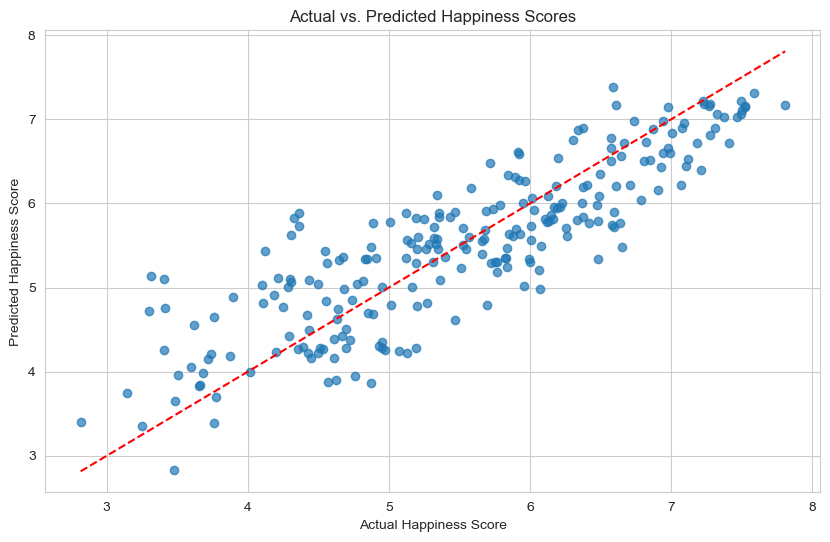

In [16]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.7)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Scores')
plt.show()

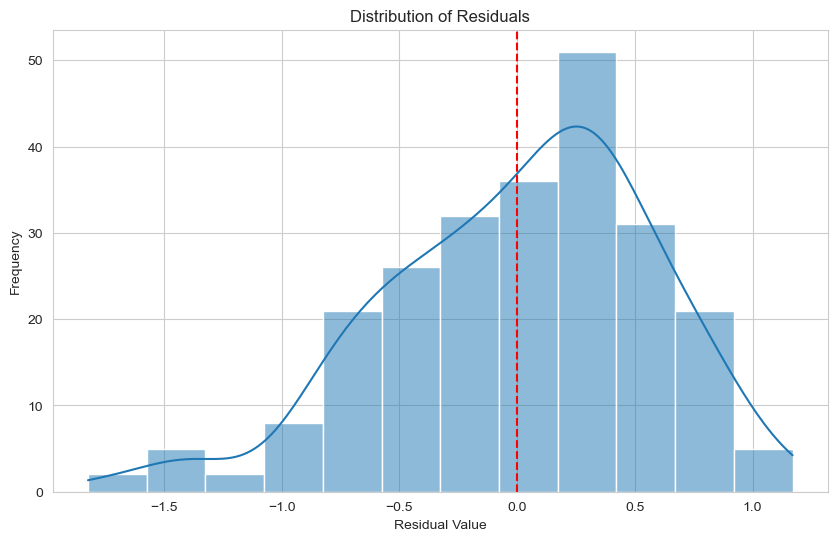

In [17]:
# Residual Analysis
residuals = y_test_multi - y_pred_multi

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()